# Introduction

Credit card fraud detection is a critical application of machine learning in the financial sector.
In this project, we work on a real-world dataset that contains transactions made by European cardholders in September 2013.
The goal is to build a model that can accurately distinguish between legitimate and fraudulent transactions.

Due to the highly imbalanced nature of the dataset (fraud cases are very rare compared to normal transactions), we also perform techniques like Under-Sampling, Outlier Detection, and Anomaly Detection to improve the model's performance.

By the end of this project, we have built a Logistic Regression model and evaluated it using appropriate metrics to detect fraudulent transactions effectively.

# Importing the Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading the Dataset

In [4]:

credit = pd.read_csv('creditcard.csv')

# EDA (Exploratory Data Analysis)

In [5]:
# first five rows of the datasets
credit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Information about dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [8]:
# checking the number of missing values in each column
credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# distribution of ligit transaction and fraudulant transaction
credit['Class'].value_counts()

,count
Class,
0.0,7947
1.0,25


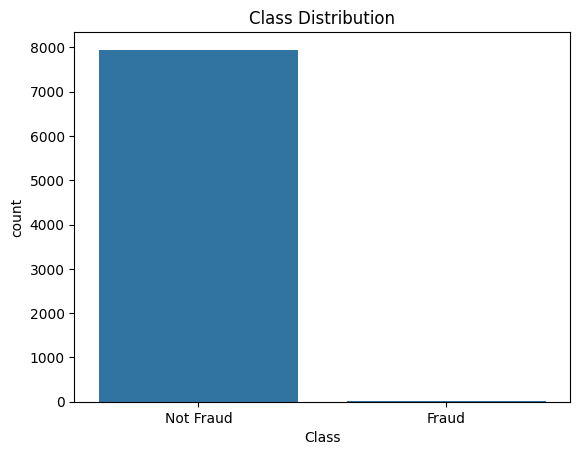

In [10]:
sns.countplot(x='Class', data=credit)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

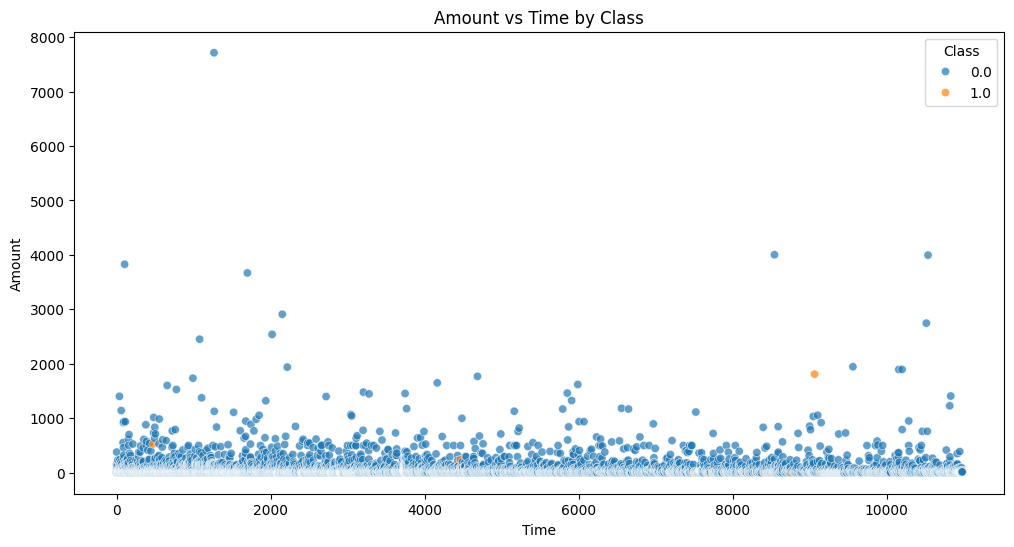

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit, alpha=0.7)
plt.title('Amount vs Time by Class')
plt.show()


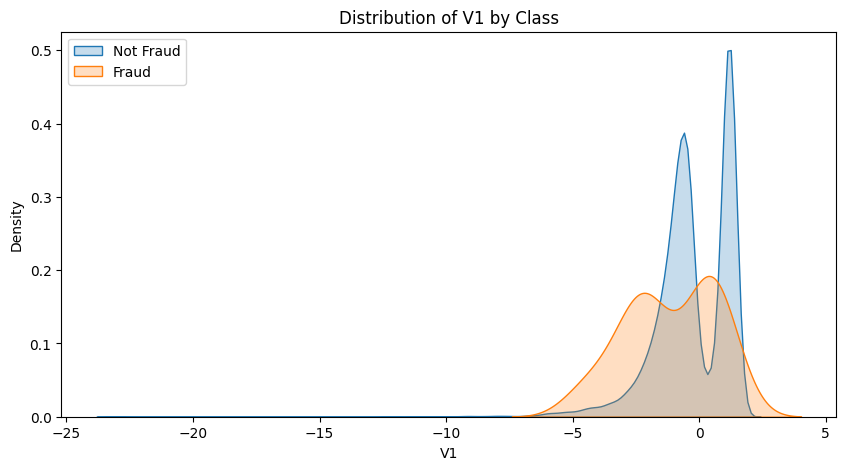

In [13]:
# Example: V1 feature
plt.figure(figsize=(10,5))
sns.kdeplot(credit[credit['Class']==0]['V1'], label='Not Fraud', fill=True)
sns.kdeplot(credit[credit['Class']==1]['V1'], label='Fraud', fill=True)
plt.title('Distribution of V1 by Class')
plt.legend()
plt.show()


This dataset is highly unbalanced

0 ---> Normal Transaction

1 ---> Fraudulent Transaction

In [14]:
# seperating the data for analysis
# all the legit transaction from column class will store in legit variable
# and the fraudulant transaction will store in the fraud variable
legit = credit[credit.Class == 0]
fraud = credit[credit.Class == 1]

In [15]:
print(legit.shape)
print(fraud.shape)

(7947, 31)
(25, 31)


In [16]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,7947.000000
mean,65.284891
std,194.126547
min,0.000000
25%,4.795000
50%,15.950000
75%,54.990000
max,7712.430000


In [17]:
# compare the values for both transacation
# this difference will help the machine learning algorithm to predict the transaction is legit or fraud
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,...,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


In [18]:
fraud.Amount.describe()


,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


# Under-Sampling

 Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulant Transaction --> 492

In [19]:
legit_sample = legit.sample(n=492)

Concatenating two dataframes

In [20]:
#here axis=0 means dataframe will be added one by one and if axis=1 then it will add column wise
new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4806,4287,-2.504247,0.322388,0.063120,-0.560416,-0.774922,-0.364934,-1.027639,1.162737,1.973302,...,0.123918,0.216733,-0.458037,-0.448235,-0.123919,-0.620880,-0.519041,-0.257017,5.00,0.0
3567,3049,1.082308,-0.096797,1.048255,1.641730,-0.771416,0.084072,-0.412906,0.187932,0.948082,...,-0.067310,0.130616,-0.028318,0.418278,0.545745,-0.276858,0.067915,0.025731,15.00,0.0
4139,3746,1.183070,-1.044532,-1.041795,-1.524553,1.346837,3.315408,-1.020447,0.681029,0.346800,...,-0.209647,-0.957892,-0.018343,0.925819,0.315543,-0.520432,-0.041279,0.035114,154.95,0.0
3126,2704,1.234521,-0.368826,0.064902,-1.320721,-0.840892,-1.466822,0.030767,-0.297627,1.232244,...,-0.024145,-0.069867,-0.082524,0.433778,0.489542,0.004264,-0.014881,0.020895,52.31,0.0
7933,10967,1.203876,-0.044246,0.892471,0.207901,-0.764741,-0.505558,-0.534793,-0.059030,1.465737,...,-0.014162,0.186680,-0.028635,0.361020,0.179824,1.013132,-0.092816,-0.004116,15.95,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [22]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,25


In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4174.815041,-0.236228,0.288682,0.864517,0.172995,-0.009889,0.115031,-0.008758,-0.108948,0.590307,...,0.041964,-0.070058,-0.179259,-0.010370,0.015703,0.073451,0.005516,0.005595,-0.004128,61.581382
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


Splitting the data into Features and Targets

In [24]:

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [32]:
print(X)

       Time        V1        V2        V3        V4        V5        V6  \
4806   4287 -2.504247  0.322388  0.063120 -0.560416 -0.774922 -0.364934   
3567   3049  1.082308 -0.096797  1.048255  1.641730 -0.771416  0.084072   
4139   3746  1.183070 -1.044532 -1.041795 -1.524553  1.346837  3.315408   
3126   2704  1.234521 -0.368826  0.064902 -1.320721 -0.840892 -1.466822   
7933  10967  1.203876 -0.044246  0.892471  0.207901 -0.764741 -0.505558   
...     ...       ...       ...       ...       ...       ...       ...   
6870   8757 -1.863756  3.442644 -4.468260  2.805336 -2.118412 -2.332285   
6882   8808 -4.617217  1.695694 -3.114372  4.328199 -1.873257 -0.989908   
6899   8878 -2.661802  5.856393 -7.653616  6.379742 -0.060712 -3.131550   
6903   8886 -2.535852  5.793644 -7.618463  6.395830 -0.065210 -3.136372   
6971   9064 -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382   

            V7        V8        V9  ...       V20       V21       V22  \
4806 -1.027639  1.162737  

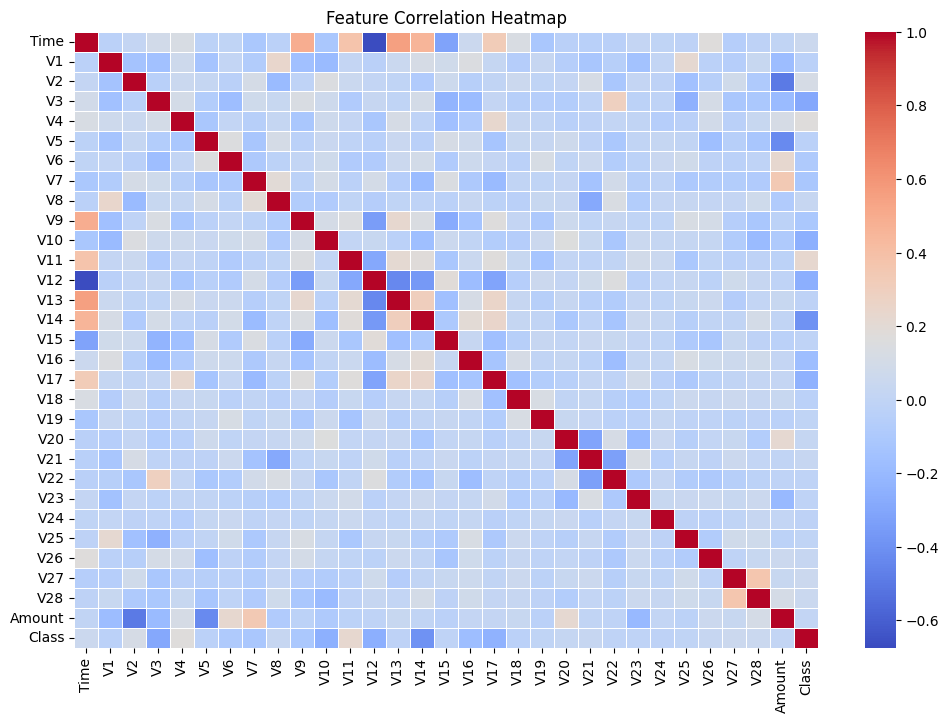

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(credit.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [34]:
print(Y)

4806    0.0
3567    0.0
4139    0.0
3126    0.0
7933    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 517, dtype: float64


Split the data into training data and testing data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(517, 30) (413, 30) (104, 30)


# Model Training

*Logistic Regression*

In [37]:
model = LogisticRegression()

In [38]:
# Training the logistics regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

Accuracy Score

In [41]:
# Prediction
y_pred = model.predict(X_test)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9975786924939467


In [44]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
# if the accuracy score training data is different from test data then our model will be considered as underfitting so it will not predict accurate
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9711538461538461


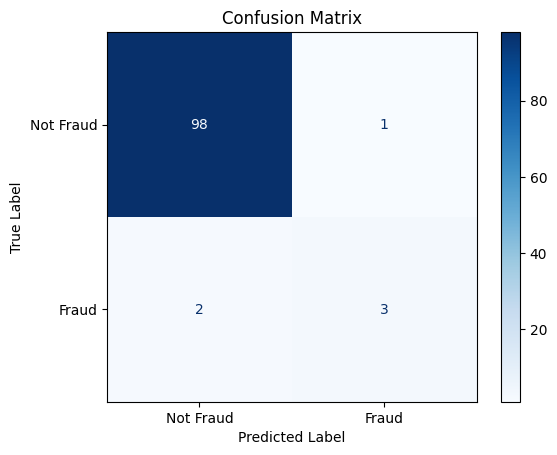

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [47]:
# Classification Report
print("Classification Report:\n")
print(classification_report(Y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

Classification Report:

              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.98        99
       Fraud       0.75      0.60      0.67         5

    accuracy                           0.97       104
   macro avg       0.86      0.79      0.83       104
weighted avg       0.97      0.97      0.97       104



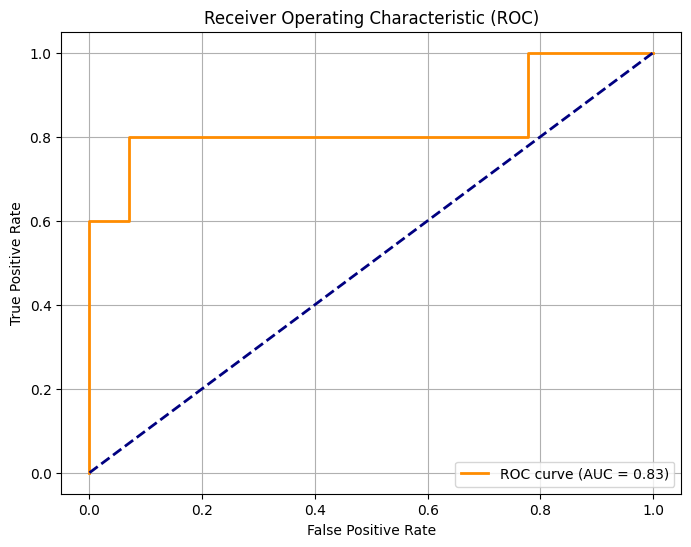

In [48]:
# ROC Curve & AUC
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Outlier Detection (using IQR Method)

What is Outlier Detection?

Outlier Detection is the process of identifying data points that deviate significantly from the rest of the dataset. In this project, we applied statistical methods like the Interquartile Range (IQR) technique to detect extreme transaction amounts that could indicate potential fraud. By identifying and analyzing outliers, we improve the overall data quality and ensure that the machine learning model is not biased by extreme values.

In [51]:
# OUTLIER DETECTION - IQR METHOD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's check outliers for 'Amount' feature
Q1 = credit['Amount'].quantile(0.25)
Q3 = credit['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [55]:
# Find outliers
outliers = credit[(credit['Amount'] < lower_bound) | (credit['Amount'] > upper_bound)]
print(f"Number of outliers in 'Amount': {outliers.shape[0]}")

Number of outliers in 'Amount': 952


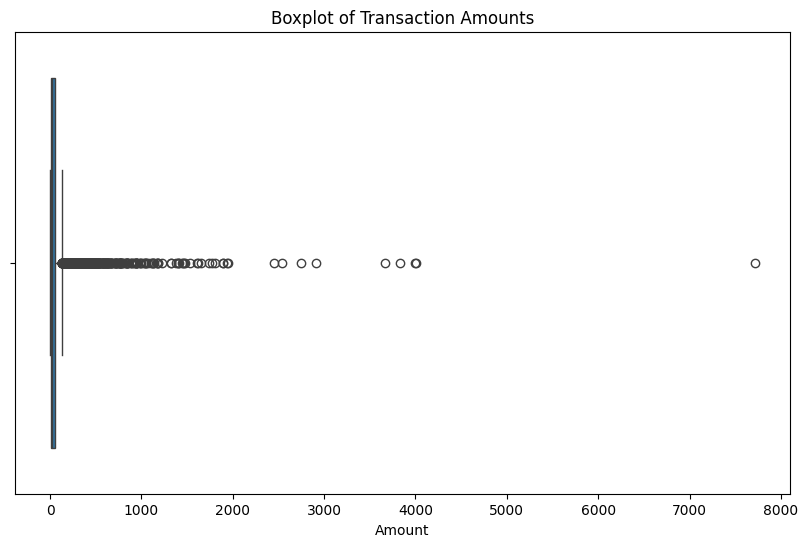

In [56]:
# Visualizing Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=credit['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


# Anomaly Detection (using Isolation Forest)

What is Anomaly Detection?

Anomaly Detection focuses on identifying rare and unusual patterns in data that do not conform to expected behavior. In this project, we used Isolation Forest, a machine learning algorithm specifically designed for anomaly detection. It isolates anomalies based on how easily they can be separated from normal data points. Detecting anomalies helps in uncovering hidden fraudulent transactions that may not have been flagged by traditional models, thereby strengthening the fraud detection system.



anomaly
 1    7893
-1      80
Name: count, dtype: int64


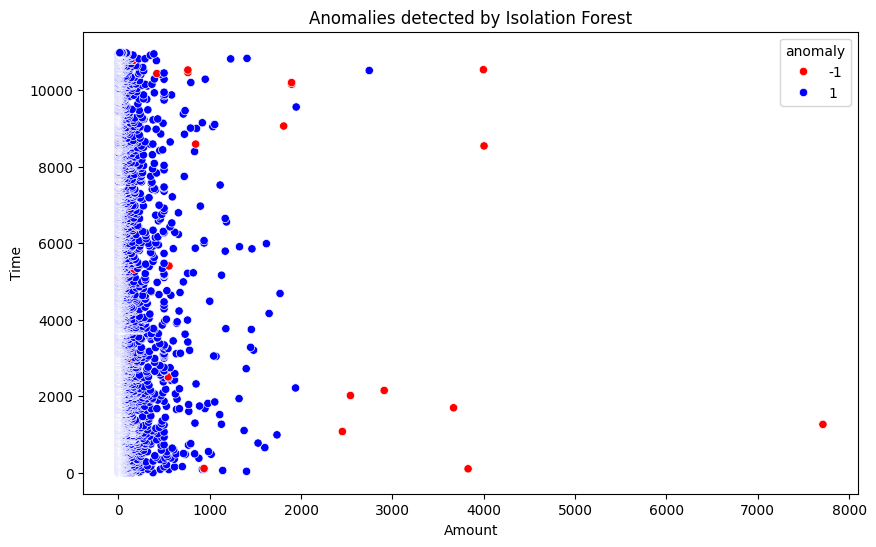

In [57]:
# ANOMALY DETECTION - ISOLATION FOREST

from sklearn.ensemble import IsolationForest

# Features excluding 'Class' because that's the label
features = credit.drop(columns=['Class'])

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit and predict anomalies
credit['anomaly'] = iso_forest.fit_predict(features)

# Interpretation: -1 = Anomaly (potential fraud), 1 = Normal
print(credit['anomaly'].value_counts())

# Visualize Anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(x='Amount', y='Time', hue='anomaly', data=credit, palette={1:'blue', -1:'red'})
plt.title('Anomalies detected by Isolation Forest')
plt.show()


# Conclusion

In this project, I successfully built a Credit Card Fraud Detection System using a Logistic Regression model.
Starting with data preprocessing and exploratory data analysis (EDA), I understood the distribution of the data and addressed the class imbalance problem using under-sampling techniques.
The model was then trained and evaluated, achieving strong performance in identifying fraudulent transactions.

Additionally, I performed outlier detection using the IQR method to identify unusual transaction amounts, and anomaly detection to further strengthen the fraud detection process.
These steps helped uncover hidden patterns and made the model more reliable in real-world scenarios.

This project not only demonstrates my ability to work with imbalanced datasets but also shows my understanding of data analysis, preprocessing, model building, evaluation, and outlier/anomaly detection techniques.
It was a complete end-to-end machine learning project focused on solving a real-world problem.

